In [34]:
import pandas as pd

#Setting Index = Loan ID instead of numbers
data = pd.read_csv("E:/Data Science/CSV dataset/Loan Prediction Problem Dataset/train.csv", index_col = 'Loan_ID')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [35]:
#Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [37]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

    LoanAmount has (614 – 592) 22 missing values.
    Loan_Amount_Term has (614 – 600) 14 missing values.
    Credit_History has (614 – 564) 50 missing values.
    We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
    The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

In [38]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [39]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

(array([ 17., 224., 182.,  81.,  29.,  25.,  15.,   7.,   5.,   7.,   6.,
          3.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <a list of 50 Patch objects>)

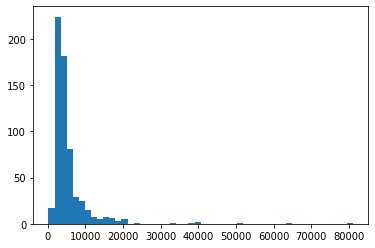

In [40]:
#Performing the visualization of the dataset usng Histograms

plt.hist(data['ApplicantIncome'], bins = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1b0224dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1b022ffc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1b0220708>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1b0232908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1b0238ac8>],
 'means': []}

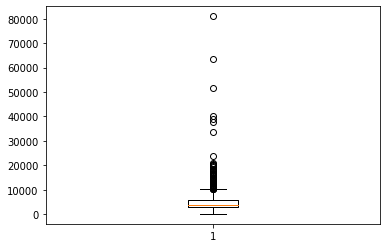

In [41]:
#Plotting the boxplot of same variable

plt.boxplot(data['ApplicantIncome'])

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

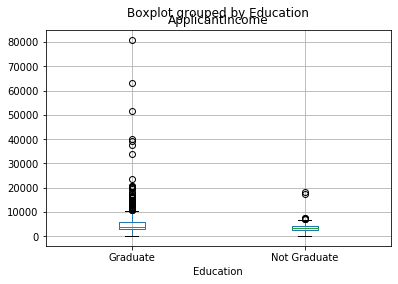

In [42]:
data.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

C:\Users\pushp\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pushp\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 12.,  60., 142., 168.,  90.,  53.,  15.,  18.,  10.,   5.,   4.,
          2.,   1.,   4.,   3.,   0.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <a list of 20 Patch objects>)

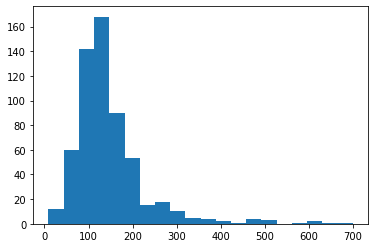

In [43]:
#looking at the histogram and boxplot of LoanAmount


plt.hist(data['LoanAmount'], bins = 20)

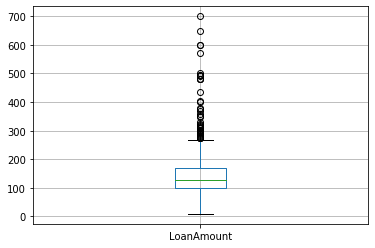

In [44]:
#Plotting Boxplot

#Using theis method as using plt.boxplot is giving error and not plotting it.

data.boxplot(column='LoanAmount')

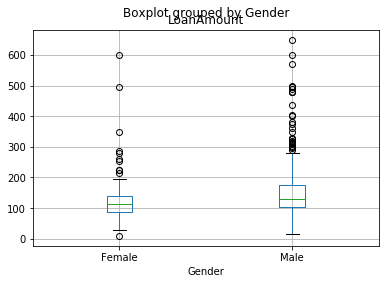

In [45]:
data.boxplot(column ='LoanAmount', by = 'Gender')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding.

In [46]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Boolean Indexing in Pandas

list of all females who are not graduates and got a loan. 

In [47]:
#First the conditions and in another square brackets the columns to check/see

#Syntax = data.loc[(Conditions), [Columns to see]]

data.loc[(data['Gender'] == 'Female') & (data['Education'] == 'Not Graduate') & (data['Loan_Status'] == 'Y'), ['Married']]

,Married
Loan_ID,
LP001155,Yes
LP001669,No
LP001692,No
LP001908,Yes
LP002300,No
LP002314,No
LP002407,Yes
LP002489,No
LP002502,Yes


In [48]:
## Defining a function which returns the total NaN values in particulat row/column

def nan_missing(x):
    """
    input = any row/column
    output = total NaN values in that row/column
    """
    return x.isnull().sum()

In [49]:
data.apply(nan_missing, axis = 0)     #axis=0 defines that function is to be applied on each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
data.apply(nan_missing, axis = 1).head(10)      #axis=0 defines that function is to be applied on each row

Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
LP001011    0
LP001013    0
LP001014    0
LP001018    0
LP001020    0
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Imputing missing values using Pandas::

Imputing the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [51]:
from scipy.stats import mode

#calculating mode of above columns

print(mode(data['Gender']))
print(mode(data['Married']))
print(mode(data['Self_Employed']))

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))
ModeResult(mode=array(['Yes'], dtype=object), count=array([398]))
ModeResult(mode=array(['No'], dtype=object), count=array([500]))


mode can be an array as there can be multiple values with high frequency. We will take the first one by default 

In [52]:
mode(data['Gender']).mode[0]

'Male'

In [53]:
# filling the missing values in the Pandas Dataframe data using fillna method

data['Gender'].fillna(mode(data['Gender']).mode[0], inplace = True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

print(data.apply(nan_missing, axis = 0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Pivot Table in Pandas

Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “LoanAmount” which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. The mean ‘LoanAmount’ of each group in Pandas dataframe can be determined as:

In [54]:
pivot_val = data.pivot_table(values = ['LoanAmount'], index = ['Gender', 'Married', 'Self_Employed'], aggfunc = np.mean)
print(pivot_val)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Pandas Crosstab ::

This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation

In [55]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [56]:
# Defining a function that calculates percent in crosstab table

def percent(x):
    
    percent = x / float(x[-1])
    return percent

pd.crosstab(data['Credit_History'], data['Loan_Status'], margins = True).apply(percent)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.458101,0.018182,0.157801
1.0,0.541899,0.981818,0.842199
All,1.000000,1.000000,1.000000


In [57]:
## Another method of calling and using function to get the values  

A = pd.crosstab(data['Credit_History'], data['Loan_Status'], margins = True)   
A.apply(percent)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.458101,0.018182,0.157801
1.0,0.541899,0.981818,0.842199
All,1.000000,1.000000,1.000000


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Sorting Pandas DataFrames

Pandas allow easy sorting based on multiple columns. This can be done as:

In [58]:
# Syntax = df.sort_values([columns to be sorted], ascending = )[Columns to be displayed]

data.sort_values(['ApplicantIncome', 'CoapplicantIncome'], ascending = False)[['Education', 'Gender', 'Loan_Status']]

,Education,Gender,Loan_Status
Loan_ID,,,
LP002317,Graduate,Male,N
LP002101,Graduate,Male,Y
LP001585,Graduate,Male,Y
LP001536,Graduate,Male,Y
LP001640,Graduate,Male,Y
...,...,...,...
LP001644,Graduate,Male,Y
LP002603,Graduate,Female,Y
LP002949,Graduate,Female,N


In [59]:
#Another way of writing above command

sort = data.sort_values(['ApplicantIncome', 'CoapplicantIncome'], ascending = False)
sort[['Education', 'Gender', 'Loan_Status']].head(10)

,Education,Gender,Loan_Status
Loan_ID,,,
LP002317,Graduate,Male,N
LP002101,Graduate,Male,Y
LP001585,Graduate,Male,Y
LP001536,Graduate,Male,Y
LP001640,Graduate,Male,Y
LP002422,Graduate,Male,Y
LP001637,Graduate,Male,N
LP001448,Graduate,Male,Y
LP002624,Graduate,Male,Y


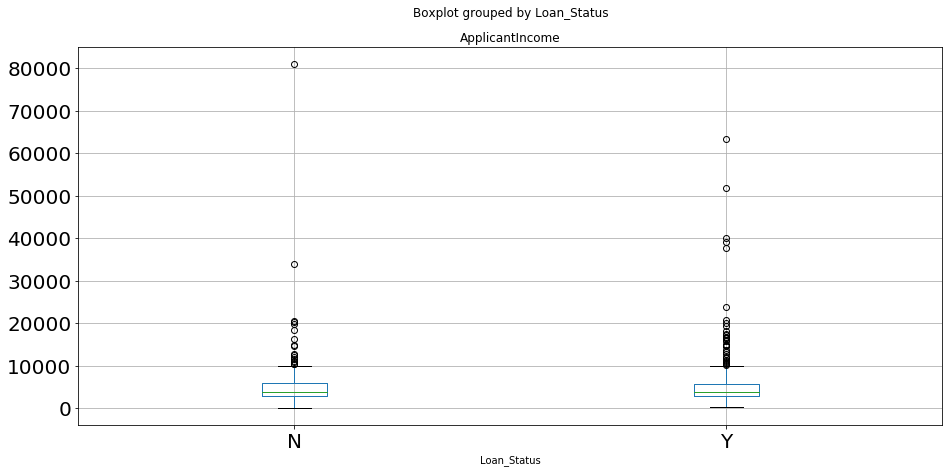

In [60]:
#Plotting the box plot to visualize applicant income by loan status

data.boxplot(column = 'ApplicantIncome', by = 'Loan_Status', fontsize = 20, figsize = (15,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1B08DAE88>,
      dtype=object)

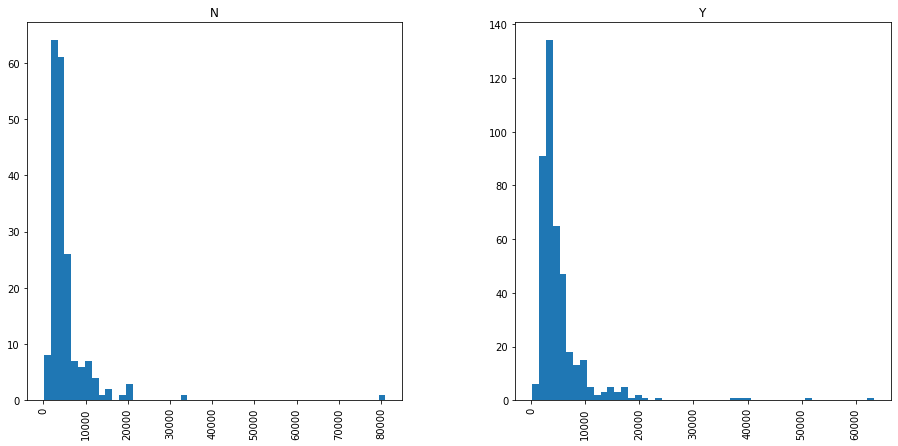

In [61]:
#Plotting the hist plot to visualize applicant income by loan status

data.hist(column = 'ApplicantIncome', by = 'Loan_Status', grid = True, bins = 50, figsize = (15,7))

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan

In [62]:
# Making a pivot table using Credit History and Loan Status

temp1 = data.pivot_table(values = 'Credit_History', index = ['Loan_Status'], margins = True)
print(temp1)
temp2 = data['Credit_History'].value_counts()

             Credit_History
Loan_Status                
N                  0.541899
Y                  0.981818
All                0.842199


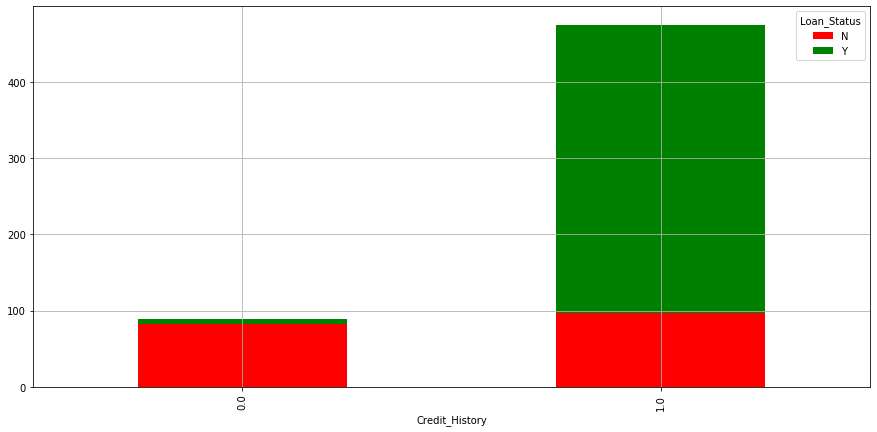

In [63]:
#Plotting combined Boxplot 

temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind = 'bar', stacked = True, color = ['red', 'green'], grid = True, figsize = (15,7))

In [64]:
temp4 = data.pivot_table(values = 'Credit_History', index = ['Loan_Status', 'Gender'])
temp4

Credit_History
Loan_Status Gender                
N           Female        0.555556
            Male          0.538462
Y           Female        0.984615
            Male          0.981250

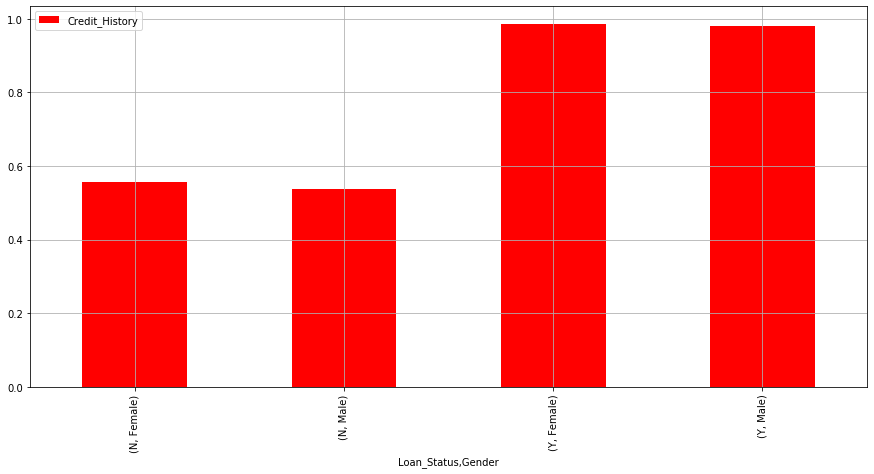

In [65]:

temp4.plot(kind = 'bar', stacked = True, grid = True, figsize = (15,7), color = ['red', 'blue'])

In [73]:
data.apply(nan_missing, axis = 0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
#Filling the Loan Amount term missing values

print('Unique Values in Loan Amount Term column is :: \n', data['Loan_Amount_Term'].value_counts())

#Filling values with the mean values

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace = True)

print('\nNaN Values after filling the missing values : ', data['Loan_Amount_Term'].isnull().sum())

Unique Values in Loan Amount Term column is :: 
 360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

NaN Values after filling the missing values :  0


In [82]:
temp5 = data.pivot_table(values = 'Loan_Amount_Term', index = ['Education', 'Self_Employed'])
print(temp5)

                            Loan_Amount_Term
Education    Self_Employed                  
Graduate     No                   345.672289
             Yes                  337.938462
Not Graduate No                   332.871795
             Yes                  330.705882


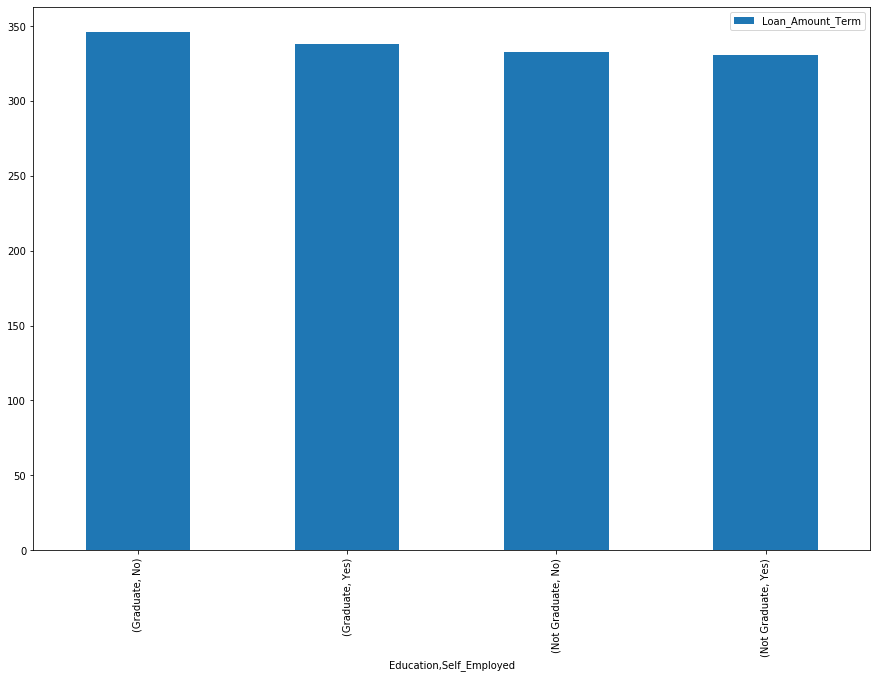

In [87]:
#Plotting the boxplot to see the trend

temp5.plot(kind = 'bar', stacked = True ,figsize = (15,10))

In [92]:
#Checking the unique values in Loam Amount 
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [93]:
#filling missing values in the above column

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

print('\nNaN Values after filling the missing values : ', data['LoanAmount'].isnull().sum())


NaN Values after filling the missing values :  0


In [99]:
# Plotting the Loan Amount to see the trend

temp6 = data.pivot_table(values = 'LoanAmount', index = ['Education', 'Self_Employed'], margins = True)

temp6

LoanAmount
Education    Self_Employed            
Graduate     No             149.628785
             Yes            180.588254
Not Graduate No             117.725514
             Yes            134.647059
All                         146.412162

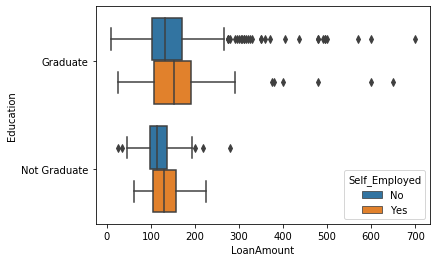

In [101]:
import seaborn as sns
sns.boxplot(x = 'LoanAmount', y = 'Education', hue = 'Self_Employed', data = data)

Thus we see some variations in the median of loan amount for each group and this can be used to impute the values. But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

In [102]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are "No", it is safe to impute the missing values as "No" as there is a high probability of success.

------------------------------------------------------------------------------------------------

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. 

In [108]:
temp7 = data.pivot_table(values = 'LoanAmount', index = 'Self_Employed', columns = 'Education', margins = True, aggfunc = np.median)
temp7

Education,Graduate,Not Graduate,All
Self_Employed,,,
No,131.0,115.0,127.000000
Yes,152.0,130.0,146.412162
All,134.0,120.0,129.000000


In [113]:
#Replacing missing values in LoanAmount

data['LoanAmount'][data['LoanAmount'].isnull()] = data['LoanAmount'].median()

print('\nNaN Values after filling the missing values : ', data['LoanAmount'].isnull().sum())


NaN Values after filling the missing values :  0


C:\Users\pushp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


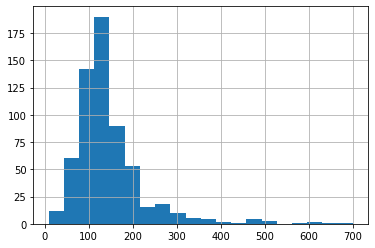

In [118]:
data['LoanAmount'].hist(bins = 20)

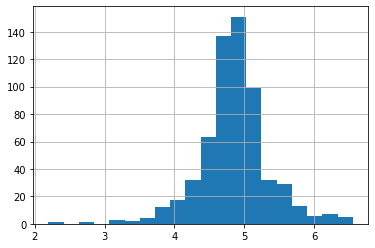

In [117]:
#Normalizing the effect of the outliers 

import numpy as np

data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins = 20)

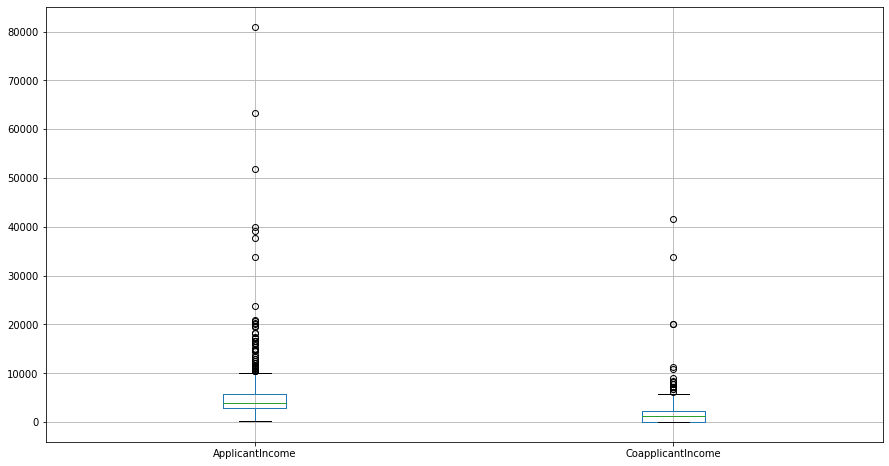

In [126]:
# Coming to ApplicantIncome. Plotting boxplot to check for outliers


data.boxplot(column = ['ApplicantIncome', 'CoapplicantIncome'], figsize = (15,8))


Since it has some outliers. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

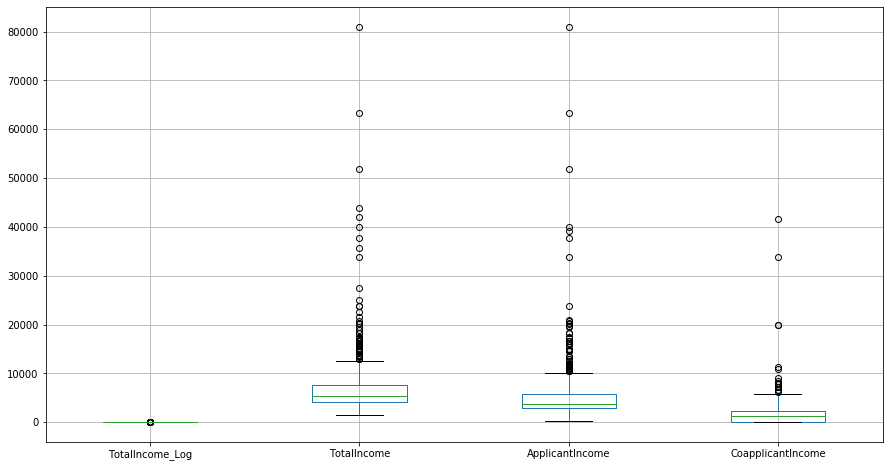

In [128]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_Log'] = np.log(data['TotalIncome'])

#Plotting the new column with the previous two columns to see the effect of the outliers 

data.boxplot(column = ['TotalIncome_Log', 'TotalIncome', 'ApplicantIncome', 'CoapplicantIncome'], figsize = (15,8))

In [132]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_Log'],
      dtype='object')

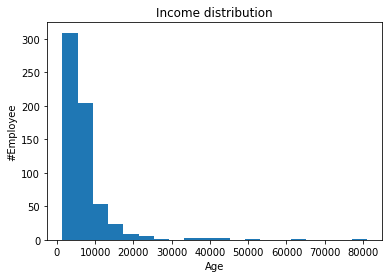

In [143]:
##Visualizing more using subplots

import matplotlib.pyplot as plt

#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig = plt.figure()

#Create one or more subplots using add_subplot, because you can't create blank figure 
ax = fig.add_subplot(1,1,1)           ## (1,1,1) shows nrows, ncolumns, nindex

#plotting the histplot

ax.hist(data['TotalIncome'], bins = 20)

#Labels and Title 
plt.title('Income distribution') 
plt.xlabel('Age') 
plt.ylabel('#Employee') 
plt.show()

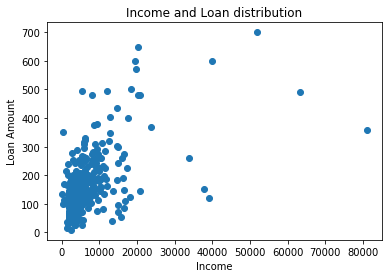

In [150]:
## Drawing Scatter plot

#In matplotlib figures reside in a figure so defining plt.figure

fig = plt.figure()

#Creating a subplot

ax = fig.add_subplot(1,1,1)

#drawing scatter plot

ax.scatter(x = data['ApplicantIncome'], y = data['LoanAmount'])

#Labels and Title 
plt.title('Income and Loan distribution') 
plt.xlabel('Income') 
plt.ylabel('Loan Amount') 
plt.show() 

--------------------------------------------------------------------------------------------------------------

# Generating frequency tables with pandas

In [162]:
table = data.groupby(['Gender','Education', 'Self_Employed', 'ApplicantIncome', 'TotalIncome'])
table.size()

Gender  Education     Self_Employed  ApplicantIncome  TotalIncome
Female  Graduate      No             416              42083.0        1
                                     645              4328.0         1
                                     1378             3259.0         1
                                     1500             3300.0         1
                                     1811             3477.0         1
                                                                    ..
Male    Not Graduate  Yes            4735             4735.0         1
                                     5703             5703.0         1
                                     5800             5800.0         1
                                     6383             7383.0         1
                                     7100             7100.0         1
Length: 603, dtype: int64

-------------------------------------------------------------------------------------------------------------------

# removing duplicate values of a variable by using drop_duplicates()

Not Performing as this will change the dataset

#remove_duplicates = data.drop_duplicates(['ApplicantIncome'])
#remove_duplicates

-------------------------------------------------------------------------------------------------------------------

# Grouping variables in Python to calculate count, average, sum

In [171]:
define = data.groupby(['Education'])
define.describe()

ApplicantIncome                                            \
                       count         mean          std    min      25%   
Education                                                                
Graduate               480.0  5857.433333  6739.797954  150.0  2998.75   
Not Graduate           134.0  3777.283582  2237.081586  210.0  2583.00   

                                       CoapplicantIncome               ...  \
                 50%      75%      max             count         mean  ...   
Education                                                              ...   
Graduate      4000.0  6068.75  81000.0             480.0  1717.474833  ...   
Not Graduate  3357.5  4333.00  18165.0             134.0  1276.544776  ...   

             TotalIncome          TotalIncome_Log                      \
                     75%      max           count      mean       std   
Education                                                               
Graduate          8334.0  81000.0           480.0  8.728368  0.571542   
Not Graduate      5763.0  18165.0           134.0  8.458235  0.368186   

                                                                 
                   min       25%       50%       75%        max  
Education                                                        
Graduate      7.539027  8.361240  8.653993  9.028099  11.302204  
Not Graduate  7.273786  8.263446  8.467792  8.659195   9.807252  

[2 rows x 64 columns]

# Recognizing and Treating missing values and outliers

#Example to impute missing values in Age by the mean 
import numpy as np 

#Using numpy mean function to calculate the mean value 

meanAge = np.mean(df.Age)     


df.Age = df.Age.fillna(meanAge) 